In [27]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [28]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 6:3:1
df = pd.read_csv('/content/HSG-Historical-Data.csv', sep=",")
df=df['Price']

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df = df.str.replace(',', '').astype(float)


# Split the data into training, testing, and validation sets
train_size = int(0.9 * len(df))
test_size = int(0.1 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [29]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [30]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [31]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[11043.95818038 11034.5501558  11025.14213122 11015.73410665
 11006.32608207 10996.91805749 10987.51003292 10978.10200834
 10968.69398376 10959.28595919 10949.87793461 10940.46991003
 10931.06188546 10921.65386088 10912.2458363  10902.83781173
 10893.42978715 10884.02176257 10874.613738   10865.20571342
 10855.79768884 10846.38966427 10836.98163969 10827.57361512
 10818.16559054 10808.75756596 10799.34954139 10789.94151681
 10780.53349223 10771.12546766]


In [32]:
# 7. Đánh giá độ chính xác thuật toán
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing RMSE: 6134.124234309856
Testing MAPE: 110.74630862767403
Testing MAE: 6084.424390470925


In [33]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[11043.95818038 11034.5501558  11025.14213122 11015.73410665
 11006.32608207 10996.91805749 10987.51003292 10978.10200834
 10968.69398376 10959.28595919 10949.87793461 10940.46991003
 10931.06188546 10921.65386088 10912.2458363  10902.83781173
 10893.42978715 10884.02176257 10874.613738   10865.20571342
 10855.79768884 10846.38966427 10836.98163969 10827.57361512
 10818.16559054 10808.75756596 10799.34954139 10789.94151681
 10780.53349223 10771.12546766 10761.71744308 10752.3094185
 10742.90139393 10733.49336935 10724.08534477 10714.6773202
 10705.26929562 10695.86127104 10686.45324647 10677.04522189
 10667.63719731 10658.22917274 10648.82114816 10639.41312358
 10630.00509901 10620.59707443 10611.18904986 10601.78102528
 10592.3730007  10582.96497613 10573.55695155 10564.14892697
 10554.7409024  10545.33287782 10535.92485324 10526.51682867
 10517.10880409 10507.70077951 10498.29275494 10488.88473036
 10479.47670578 10470.06868121 10460.660

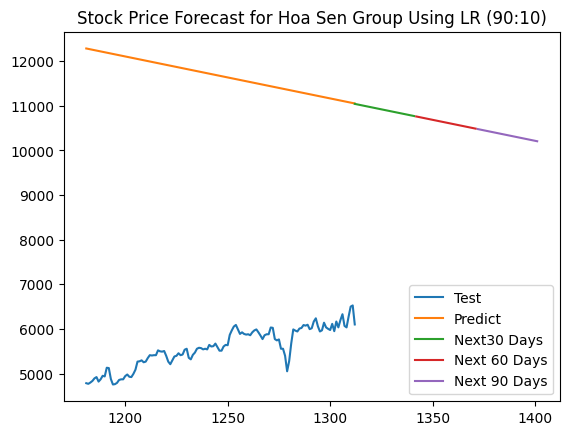

In [34]:
# 8.Vẽ hình
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(range(last_data.start, last_data.start + 30), y_next_90_days[:30])
plt.plot(range(last_data.start+30, last_data.start + 60), y_next_90_days[30:60])
plt.plot(range(last_data.start+60, last_data.start + 90), y_next_90_days[60:90])
plt.legend(['Test', 'Predict','Next30 Days', "Next 60 Days", "Next 90 Days"])
plt.title("Stock Price Forecast for Hoa Sen Group Using LR (90:10)")
plt.show()

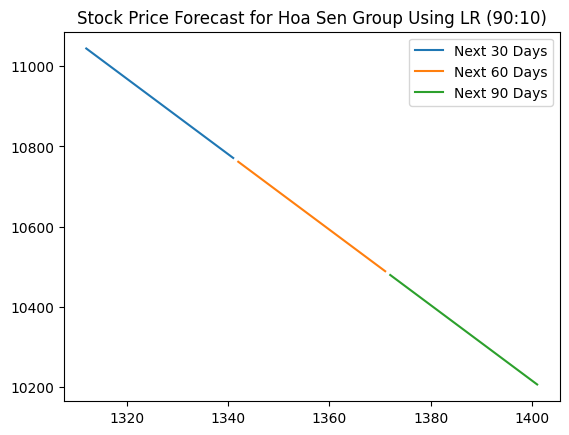

In [35]:
plt.plot(range(last_data.start, last_data.start + 30), y_next_90_days[:30])
plt.plot(range(last_data.start+30, last_data.start + 60), y_next_90_days[30:60]) # Slice y_next_90_days to match x-axis dimensions
plt.plot(range(last_data.start+60, last_data.start + 90), y_next_90_days[60:90])
plt.legend(["Next 30 Days", "Next 60 Days", "Next 90 Days"])
plt.title("Stock Price Forecast for Hoa Sen Group Using LR (90:10)")
plt.show()